### Exploratory Data ANalysis And Model building

In [6]:
# Importing Libraries:
import numpy as np  #NumPy is a general-purpose array-processing package.
import pandas as pd  #It contains high-level data structures and manipulation tools designed to make data analysis fast and easy
import matplotlib.pyplot as plt  #It is a Plotting Library.
import re
import seaborn as sns  #Seaborn is a Python data visualization library based on matplotlib.
from sklearn.linear_model import LinearRegression  #Linear Regression is a regression algorithm.
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split #Splitting of Dataset.
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn import neighbors
import warnings
warnings.filterwarnings("ignore")

In [7]:
dt=pd.read_csv("cleaned_data.csv")

In [8]:
dt.head()


,Unnamed: 0,index,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,0,0,jalsa,yes,yes,4.1,775,banashankari,casual_dining,pastalunch_buffetmasala_papadpaneer_lajawabtom...,north_indian mughlai chinese,800.0,no_reviews,unknown,buffet,banashankari
1,1,1,spice elephant,yes,no,4.1,787,banashankari,casual_dining,momoslunch_buffetchocolate_nirvanathai_green_c...,chinesenorth_indian thai,800.0,no_reviews,unknown,buffet,banashankari
2,2,2,san churro cafe,yes,no,3.8,918,banashankari,cafecasual_dining,churros cannelloniminestrone_souphot_chocolate...,cafe mexican italian,800.0,no_reviews,unknown,buffet,banashankari
3,3,3,addhuri udupi bhojana,no,no,3.7,88,banashankari,quick_bites,masala_dosa,south_indiannorth_indian,300.0,no_reviews,unknown,buffet,banashankari
4,4,4,grand village,no,no,3.8,166,basavanagudi,casual_dining,panipurigol_gappe,north_indian rajasthani,600.0,no_reviews,unknown,buffet,banashankari


In [9]:
#DRoping unwanted columns
dt.drop(["Unnamed: 0",'index'],axis='columns',inplace=True)

In [10]:
dt.isnull().sum()

name                           142
online_order                     0
book_table                       0
rate                             0
votes                            0
location                         0
rest_type                        0
dish_liked                       0
cuisines                         0
approx_cost(for two people)      0
reviews_list                     0
menu_item                        0
listed_in(type)                  0
listed_in(city)                  0
dtype: int64

In [11]:
dt['reviews_list'].fillna('no reviews',inplace=True)

In [12]:
#droping null values in name column
dt.dropna(inplace=True,axis=0)
dt.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
location                       0
rest_type                      0
dish_liked                     0
cuisines                       0
approx_cost(for two people)    0
reviews_list                   0
menu_item                      0
listed_in(type)                0
listed_in(city)                0
dtype: int64

In [13]:
dt.head(5)

,name,online_order,book_table,rate,votes,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,jalsa,yes,yes,4.1,775,banashankari,casual_dining,pastalunch_buffetmasala_papadpaneer_lajawabtom...,north_indian mughlai chinese,800.0,no_reviews,unknown,buffet,banashankari
1,spice elephant,yes,no,4.1,787,banashankari,casual_dining,momoslunch_buffetchocolate_nirvanathai_green_c...,chinesenorth_indian thai,800.0,no_reviews,unknown,buffet,banashankari
2,san churro cafe,yes,no,3.8,918,banashankari,cafecasual_dining,churros cannelloniminestrone_souphot_chocolate...,cafe mexican italian,800.0,no_reviews,unknown,buffet,banashankari
3,addhuri udupi bhojana,no,no,3.7,88,banashankari,quick_bites,masala_dosa,south_indiannorth_indian,300.0,no_reviews,unknown,buffet,banashankari
4,grand village,no,no,3.8,166,basavanagudi,casual_dining,panipurigol_gappe,north_indian rajasthani,600.0,no_reviews,unknown,buffet,banashankari


In [14]:
print("No of rows in data:","",dt.shape[0])
print("No of col in data:","",dt.shape[1])

No of rows in data:  51006
No of col in data:  14


In [15]:
#information about data
dt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51006 entries, 0 to 51147
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51006 non-null  object 
 1   online_order                 51006 non-null  object 
 2   book_table                   51006 non-null  object 
 3   rate                         51006 non-null  float64
 4   votes                        51006 non-null  int64  
 5   location                     51006 non-null  object 
 6   rest_type                    51006 non-null  object 
 7   dish_liked                   51006 non-null  object 
 8   cuisines                     51006 non-null  object 
 9   approx_cost(for two people)  51006 non-null  float64
 10  reviews_list                 51006 non-null  object 
 11  menu_item                    51006 non-null  object 
 12  listed_in(type)              51006 non-null  object 
 13  listed_in(city) 

In [16]:
dt.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [17]:
#we have done data cleaning in previous notebook 
#now we will understand our target variable i.e rating

### Analysing target variable

In [18]:
#All unique ratings
dt.rate.unique()

array([4.1, 3.8, 3.7, 3.6, 4.6, 4. , 4.2, 3.9, 3.1, 3. , 3.2, 3.3, 2.8,
       4.4, 4.3, 2.9, 3.5, 2.6, 3.4, 4.5, 2.5, 2.7, 4.7, 2.4, 2.2, 2.3,
       4.8, 4.9, 2.1, 2. , 1.8])

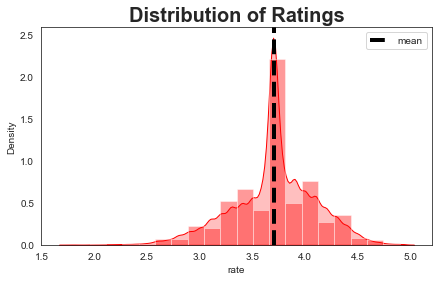

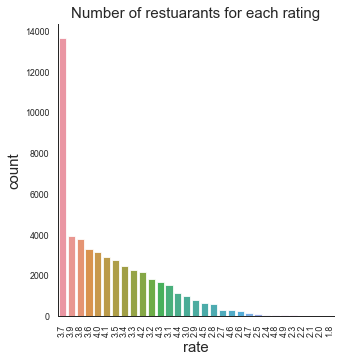

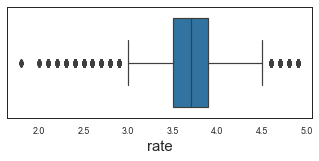

In [19]:
# Distribution of Ratings of restaurants in Bengalore.
fig = plt.figure(figsize=(7,4))

sns.set_style('white')
sns.distplot(dt['rate'], bins = 20,  color= 'red',kde_kws={"shade": True});
plt.axvline(x= dt.rate.mean(),ls='--',color='black',linewidth=4,label="mean")
plt.title("Distribution of Ratings",fontweight='bold',fontsize=20);
plt.legend(["mean"],prop={"size":10});

sns.set_context("paper",font_scale=1,rc={"font.size": 15,"axes.titlesize": 15,"axes.labelsize": 15})
b=sns.catplot(data=dt,kind='count',x='rate',order=dt['rate'].value_counts().index)
plt.title("Number of restuarants for each rating")
b.set_xticklabels(rotation=90)
plt.show()

fig = plt.figure(figsize=(12,7))
ax6 = fig.add_subplot(3,2,3)
sns.boxplot(dt['rate'],ax=ax6)
plt.show()

In [20]:
print("1st quantile of rate is:",np.quantile(dt['rate'],0.25))
print('2nd quantile of rate is:',np.quantile(dt['rate'],0.5))
print('3rd quantile of rate is:',np.quantile(dt['rate'],0.75))
print('4th quantile of rate is:',np.quantile(dt['rate'],1))

1st quantile of rate is: 3.5
2nd quantile of rate is: 3.7
3rd quantile of rate is: 3.9
4th quantile of rate is: 4.9


 Most of the restaurant have the ratings between 3.3 and 4. 3.7 is the most common ratings. There are very few restaurants with rating higher than 4.5. There are hardly few restaurants with  rating between 2 to 2.5 and 4.5 to 5

In [21]:
sl=[((dt.rate>=1.5)&(dt.rate<2)).sum(),((dt.rate>=2)&(dt.rate<2.5)).sum(),
   ((dt.rate>=2.5)&(dt.rate<3)).sum(),((dt.rate>=3)&(dt.rate<3.5)).sum(),
    ((dt.rate>=3.5)&(dt.rate<4)).sum(),((dt.rate>=4)&(dt.rate<4.5)).sum(),
    ((dt.rate>=4.5)&(dt.rate<5)).sum()]
sl

[5, 178, 2033, 9073, 27469, 11008, 1240]

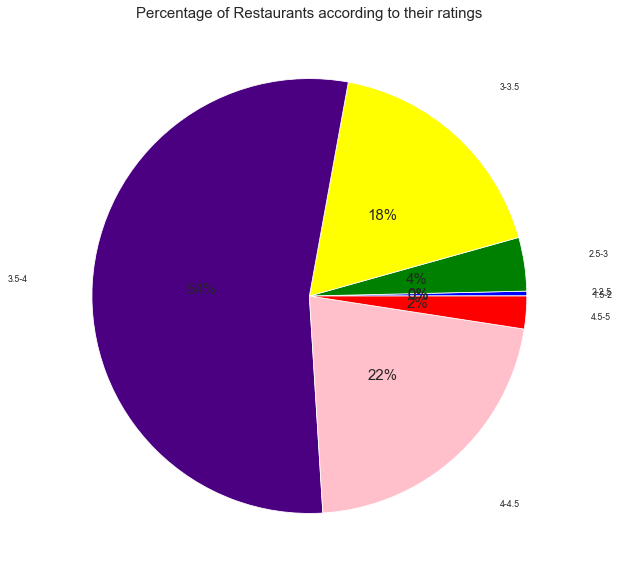

In [22]:
labels=['1.5-2','2-2.5','2.5-3','3-3.5','3.5-4','4-4.5','4.5-5']
colors = ['Red','blue','Green','yellow','indigo','pink']
plt.pie(sl,colors=colors, labels=labels, autopct='%1.0f%%', pctdistance=0.5, labeldistance=1.3)
fig = plt.gcf()
plt.title("Percentage of Restaurants according to their ratings", bbox={'facecolor':'1', 'pad':5})

fig.set_size_inches(10,10)
plt.show()

### Analysing rest of  the features

##### Analysing online order

In [23]:
print("No of restaurants with online delivery:",(dt['online_order']=='yes').sum())
print("No of restaurants with no online delivery:",(dt['online_order']=='no').sum())

No of restaurants with online delivery: 30273
No of restaurants with no online delivery: 20733


In [24]:
dt['online_order'].value_counts(normalize=True)*100

yes    59.351841
no     40.648159
Name: online_order, dtype: float64

Here 59% of the restaurants accept online order and 41% of restaurants doesnt accept online order

In [25]:
dt.groupby('rate').online_order.value_counts().unstack()

online_order,no,yes
rate,,
1.8,5.0,NaN
2.0,11.0,NaN
2.1,9.0,15.0
2.2,10.0,16.0
2.3,29.0,22.0
2.4,32.0,34.0
2.5,37.0,63.0
2.6,74.0,175.0
2.7,137.0,166.0


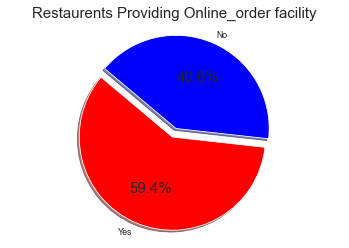

In [26]:
z=dt["online_order"].value_counts()
labels = 'Yes', 'No'
sizes = [z.yes, z.no]
colors = ['red', 'blue']
explode = (0.1, 0,) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Restaurents Providing Online_order facility")
plt.axis('equal')
plt.show()


<AxesSubplot:xlabel='rate', ylabel='online_order'>

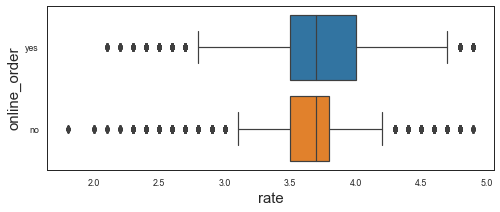

In [27]:
fig = plt.figure(figsize=(8,3))
ax1 = fig.add_subplot(1,1,1)
sns.boxplot(x=dt['rate'],y=dt['online_order'])

Restaurants are likely to get better rating if they provide online order
But it can also be consequence that because Zomato offers home delivery for online orders also, so more people will give rating for online_order restaurants on their platform.

#### Votes

<AxesSubplot:xlabel='votes', ylabel='Density'>

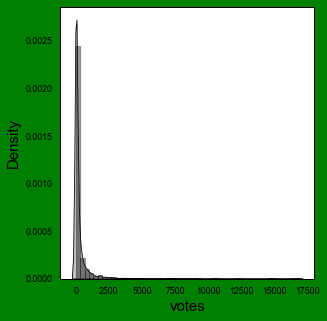

In [28]:
fig = plt.figure(figsize=(10,5))
fig.patch.set_facecolor('green')
plt.style.use('grayscale')

plt.subplot(121)
sns.distplot(dt['votes'],kde_kws={"shade": True})

 There are very less no of restaurants which has more no of votes

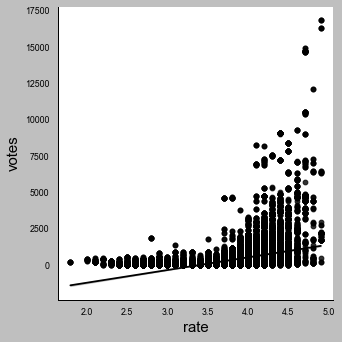

In [29]:
#Linear Relationship between rate and votes shown below:
sns.lmplot(x="rate",y="votes", data=dt);

Here in general we can observe that Restaurants with higher votes has higher ratings and with lesser ratings has lesser ratings.Higher the no of votes higher the probability of company to get higher ratings.

### Book_table facility

In [31]:
print('No of restaurants having book table facility:',(dt['book_table']=='yes').sum())
print('No of restaurants having book table facility:',(dt['book_table']=='no').sum())

No of restaurants having book table facility: 6391
No of restaurants having book table facility: 44615


In [32]:
z=dt["book_table"].value_counts()

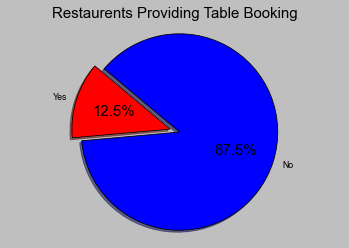

In [33]:
labels = 'Yes', 'No'
sizes = [z.yes, z.no]
colors = ['red', 'blue']
explode = (0.1, 0,) 
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
plt.title("Restaurents Providing Table Booking")
plt.axis('equal')
plt.show()

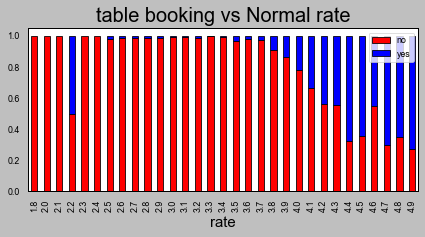

In [34]:
# relation between table booking option and rating of the restaurant
plt.rcParams['figure.figsize'] = (7,3)
Y = pd.crosstab(dt['rate'], dt['book_table'])
Y.div(Y.sum(1).astype(float), axis = 0).plot(kind = 'bar', stacked = True,color=['red','blue'])
plt.title('table booking vs Normal rate', fontweight = 30, fontsize = 20)
plt.legend(loc="upper right")
plt.show()

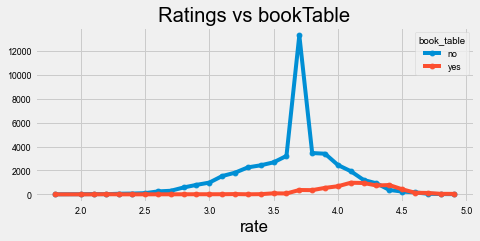

In [35]:

plt.style.use('fivethirtyeight')
pd.crosstab(dt.rate,dt.book_table).plot(kind='line',marker='o',figsize=(7,3));
plt.title("Ratings vs bookTable");

Hotels are more likely to get better rating if they provide table booking facility.


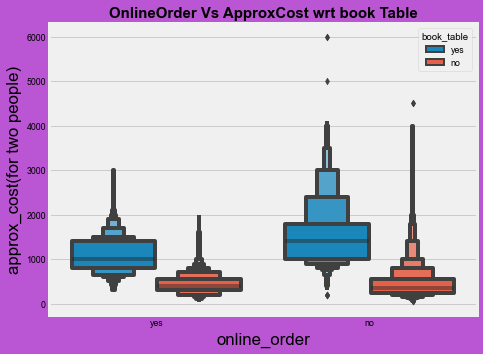

In [36]:
# OnlineOrder Vs ApproxCost wrt book Table
fig = plt.figure(figsize=(15,5))
fig.patch.set_facecolor('mediumorchid')
plt.style.use('fivethirtyeight')

plt.subplot(122)
sns.boxenplot(data=dt,x='online_order',y='approx_cost(for two people)',hue='book_table');
plt.title("OnlineOrder Vs ApproxCost wrt book Table",fontweight='bold',fontsize=15);

cost is significantly less when restaurants accept orders online and also cost is aproximately high when restaurants provide book table facility

### Analysing location

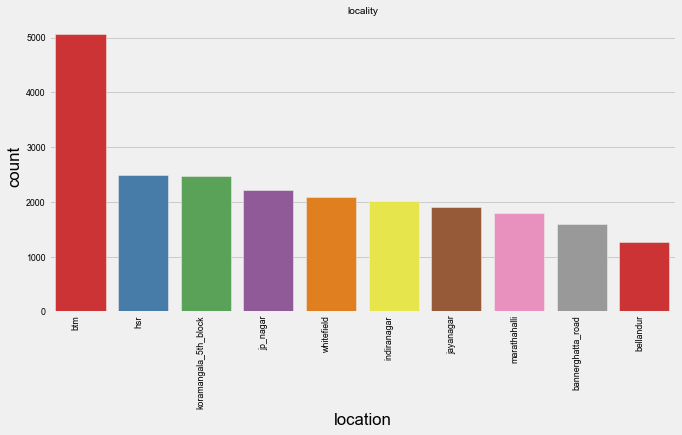

In [37]:
# Lets look at distribution of Location Variable
g = sns.countplot(x="location",data=dt, palette = "Set1",order = dt['location'].value_counts()[:10].index)
g.set_xticklabels(g.get_xticklabels(), rotation=90, ha="right")
g 
plt.title('locality',size = 10)
fig = plt.gcf()
fig.set_size_inches(10,5)

btm,Koramangala 5th block,hsr has more than 2000 restaurants each btm has highest no of restaurant among  all the areas

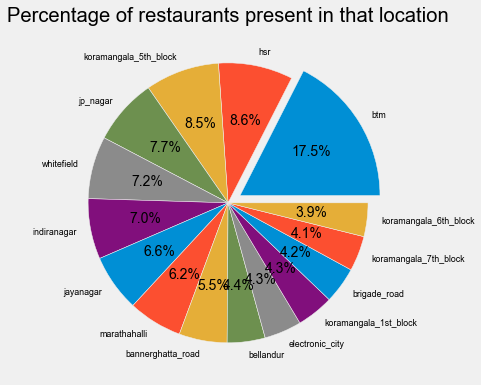

In [38]:
plt.figure(figsize=(6,6))
names = dt.location.value_counts()[:15].index
values = dt.location.value_counts()[:15].values
explode = [0.1,0,0,0,0,0,0,0,0,0,0,0,0,0,0]

plt.pie(values, explode=explode, autopct='%0.1f%%',  labels = names)
plt.title("Percentage of restaurants present in that location")
plt.show()


In [39]:
#location and rating
dt.groupby('location')['rate'].mean().sort_values(ascending=False).head(10)

location
lavelle_road             4.106310
st._marks_road           4.017201
koramangala_5th_block    3.985818
koramangala_3rd_block    3.983333
church_street            3.980107
sankey_road              3.955556
cunningham_road          3.894501
koramangala_4th_block    3.888347
rajarajeshwari_nagar     3.850000
residency_road           3.847478
Name: rate, dtype: float64

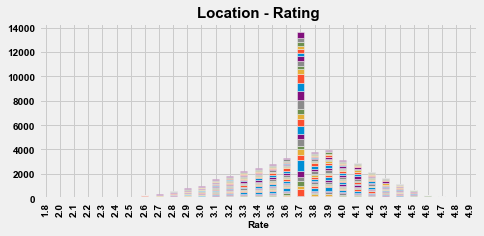

In [40]:
loc_plot=pd.crosstab(dt['rate'],dt['listed_in(city)'])
loc_plot.plot(kind='bar',stacked=True);
plt.title('Location - Rating',fontsize=15,fontweight='bold')
plt.xlabel('Rate',fontsize=10,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.yticks(fontsize=10,fontweight='bold');
plt.legend().remove();

Lavell road and st.marks road are the two locations with highest average restaurants ratings

In [44]:
pd.DataFrame(dt.groupby('location')['rate'].mean().sort_values(ascending=True).head(10))

,rate
location,
old_madras_road,3.181818
peenya,3.200000
bommanahalli,3.389407
rammurthy_nagar,3.412500
north_bangalore,3.442857
kanakapura_road,3.478947
kumaraswamy_layout,3.505759
rt_nagar,3.511538
yeshwantpur,3.514286


In [45]:
dt.groupby("location")['rate'].median().sort_values(ascending=False)

location
lavelle_road             4.3
st._marks_road           4.1
church_street            4.1
koramangala_5th_block    4.0
cunningham_road          4.0
                        ... 
north_bangalore          3.5
kanakapura_road          3.5
yeshwantpur              3.5
peenya                   3.2
old_madras_road          3.2
Name: rate, Length: 93, dtype: float64

In [46]:
a=pd.DataFrame(dt.groupby('location')['approx_cost(for two people)'].mean().sort_values())
a


,approx_cost(for two people)
location,
peenya,300.000000
city_market,302.426230
yelahanka,310.000000
cv_raman_nagar,311.111111
ejipura,320.506912
...,...
residency_road,966.320475
mg_road,1155.704698
lavelle_road,1307.934990


Lavelle road is location with high rated restaurants but its also the one among the costliest spot.Even sankey road has restaurants with good rating but its also the costlier location

#### Analysing cuisines

Text(0.5, 0, 'cuisines_count')

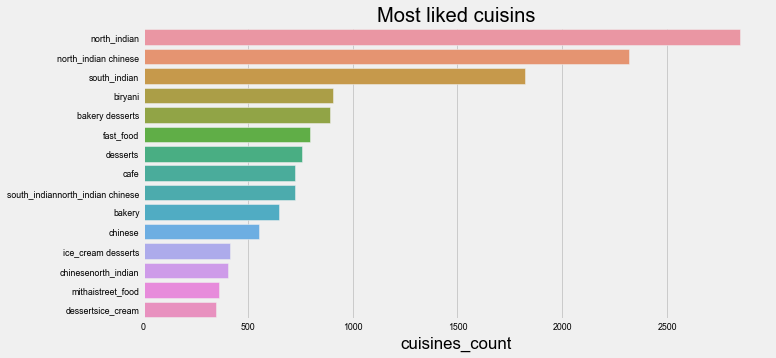

In [47]:
plt.figure(figsize=(10,5))
a=dt.cuisines.value_counts()[:15]
sns.barplot(x=a,y=a.index)
plt.title('Most liked cuisins')
plt.xlabel('cuisines_count')


We have cuisines such as north indian , south indian,chinese,biryani,cafe,desert are mostliked by bangalorians. North indian is the most liked cuisine.

In [48]:
dt.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [49]:
pd.DataFrame(dt.groupby('cuisines')['cuisines'].agg('count').sort_values(ascending=False).head(10))

,cuisines
cuisines,
north_indian,2846
north_indian chinese,2318
south_indian,1822
biryani,906
bakery desserts,891
fast_food,797
desserts,760
cafe,726
south_indiannorth_indian chinese,724


### Cost for two people

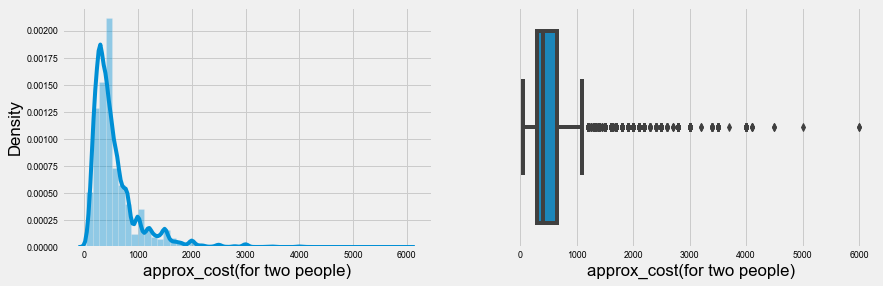

In [50]:
fig=plt.figure(figsize=(13,14))
ax4=fig.add_subplot(3,2,1)
ax5=fig.add_subplot(3,2,2)
sns.distplot(dt['approx_cost(for two people)'],ax=ax4)
sns.boxplot(dt['approx_cost(for two people)'],ax=ax5)
plt.show()


Distribution is right skewed. We can see that approximate cost for two people is less 1000 in most of the cases

In [51]:
#Top 5 costliest location in bangalore
dt.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=False).head(5)

location
sankey_road         2505.555556
race_course_road    1309.352518
lavelle_road        1307.934990
mg_road             1155.704698
residency_road       966.320475
Name: approx_cost(for two people), dtype: float64

In [52]:
pd.DataFrame(dt.groupby('location')['approx_cost(for two people)'].mean().sort_values(ascending=True).head(5))

,approx_cost(for two people)
location,
peenya,300.000000
city_market,302.426230
yelahanka,310.000000
cv_raman_nagar,311.111111
ejipura,320.506912


<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

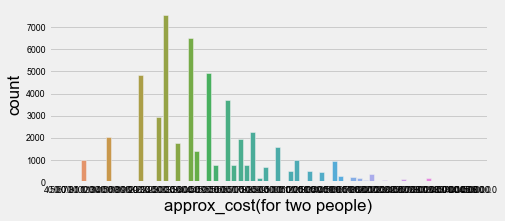

In [53]:
sns.countplot(dt['approx_cost(for two people)'])

### To determine there is a relation between online order and ratings

H0: There is no difference in mean rating of restaurasnts that provide online order facility 
    and of that restaurants that dont provide online book facility
    
H1:There is difference in mean rating of restaurasnts that provide online order facility 
    and of that restaurants that dont provide online book facility

In [54]:
from scipy import stats
yes=dt[dt['online_order']=='yes']
no=dt[dt['online_order']=='no']
stats.ttest_ind(yes['rate'],no['rate'])

Ttest_indResult(statistic=13.797616939342255, pvalue=3.1507216314588605e-43)

Here p values is less than 0.05 so we reject null hypothesis
There fore we coclude that there is relation between rating and online order facility

### To dtermine there is a relation between online order and ratings

H0: There is no difference in mean rating of restaurasnts that provide online order facility and of that restaurants that dont provide online book facility

H1:There is difference in mean rating of restaurasnts that provide online order facility and of that restaurants that dont provide online book facility

In [55]:
yes=dt[dt['book_table']=='yes']
no=dt[dt['book_table']=='no']
stats.ttest_ind(yes['rate'],no['rate'])

Ttest_indResult(statistic=102.77380626812825, pvalue=0.0)

p value is zero which is less than 0.05 so we reject null hypothesis and we coclude that there is difference in  mean rating of restaurants that provide book table facility and of that dont provide book table facility 

## Splitting the data to train test

In [56]:
dt.columns

Index(['name', 'online_order', 'book_table', 'rate', 'votes', 'location',
       'rest_type', 'dish_liked', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [57]:
x=dt.iloc[:,[0,1,2,4,5,6,7,8,9,10,11,12,13]]
y=dt.iloc[:,3]s
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [58]:
x_train.shape

(40804, 13)

In [59]:
x_test.shape

(10202, 13)

### Bag of words(Bow) vectorisation

In [51]:
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()


In [52]:
#Book order
x_train_order=vec.fit_transform(x_train['online_order'].values)
x_test_order=vec.transform(x_test['online_order'].values)
print(x_train_order.shape)
print(x_test_order.shape)

(40804, 2)
(10202, 2)


In [53]:
#Book table

x_train_booktable=vec.fit_transform(x_train['book_table'].values)
x_test_booktable=vec.fit_transform(x_test['book_table'].values)

print(x_train_booktable.shape)
print(x_test_booktable.shape)

(40804, 2)
(10202, 2)


In [54]:
#location
vec=CountVectorizer()
x_train_location=vec.fit_transform(x_train['location'].values)
x_test_location=vec.transform(x_test['location'].values)
print(x_train_location.shape)
print(x_test_location.shape)

(40804, 94)
(10202, 94)


In [55]:
#rest_type
vec=CountVectorizer()
vec.fit(x_train['rest_type'].values)
x_train_resttype=vec.transform(x_train['rest_type'].values)
x_test_resttype=vec.transform(x_test['rest_type'].values)
print(x_train_resttype.shape)
print(x_test_resttype.shape)

(40804, 91)
(10202, 91)


In [56]:
#dish liked
vec=CountVectorizer()
x_train_dishliked=vec.fit_transform(x_train['dish_liked'].values)
x_test_dishliked=vec.transform(x_test['dish_liked'].values)
print(x_train_dishliked.shape)
print(x_test_dishliked.shape)

(40804, 4988)
(10202, 4988)


In [57]:
#cuisines
vec=CountVectorizer()
x_train_cuisines=vec.fit_transform(x_train['cuisines'].values)
x_test_cuisines=vec.transform(x_test['cuisines'].values)
print(x_train_cuisines.shape)
print(x_test_cuisines.shape)

(40804, 2629)
(10202, 2629)


In [58]:
#menu_item
vec=CountVectorizer()
vec.fit(x_train['menu_item'].values)
x_train_menuitem=vec.transform(x_train['menu_item'].values)
x_test_menuitem=vec.transform(x_test['menu_item'].values)
print(x_train_menuitem.shape)
print(x_test_menuitem.shape)


(40804, 121989)
(10202, 121989)


In [59]:
#listed_in(type)

x_train_listedtype=vec.fit_transform(x_train['listed_in(type)'].values)
x_test_listedtype=vec.transform(x_test['listed_in(type)'].values)

In [60]:
#listed_in(city)
x_train_listedcity=vec.fit_transform(x_train['listed_in(city)'].values)
x_test_listedcity=vec.transform(x_test['listed_in(city)'].values)


In [61]:
#dish_liked
x_train_reviewlist=vec.fit_transform(x_train['dish_liked'].values)
x_test_reviewlist=vec.transform(x_test['dish_liked'].values)

### Normalizing numeric columns

In [62]:
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()

In [63]:
# votes

#finnding mean and stdvtn using train data

scale.fit(x_train['votes'].values.reshape(-1,1))

#normalising testand train by estimates

x_train_votes=scale.transform(x_train['votes'].values.reshape(-1,1))
x_test_votes=scale.transform(x_test['votes'].values.reshape(-1,1))
print(x_train_votes.shape)

(40804, 1)


In [64]:
#aprox_cost

#finding mean and stddvtn using train data

scale.fit(x_train['approx_cost(for two people)'].values.reshape(-1,1))

#standardizing bot test and train using paramters estimated from train
x_train_cost=scale.transform(x_train['approx_cost(for two people)'].values.reshape(-1,1))
x_test_cost=scale.transform(x_test['approx_cost(for two people)'].values.reshape(-1,1))
print(x_test_cost.shape)


(10202, 1)


### Joining all features

In [65]:
from scipy.sparse import hstack

In [66]:
x_trn=hstack((x_train_order,x_train_booktable,x_train_location,x_train_resttype,x_train_dishliked,x_train_cuisines,x_train_menuitem,x_train_listedtype,x_train_listedcity,x_train_reviewlist)).tocsr()
x_tst=hstack((x_test_order,x_test_booktable,x_test_location,x_test_resttype,x_test_dishliked,x_test_cuisines,x_test_menuitem,x_test_listedtype,x_test_listedcity,x_test_reviewlist)).tocsr()


In [67]:
print(x_trn.shape , y_train.shape)
print(x_tst.shape,y_test.shape)

(40804, 134822) (40804,)
(10202, 134822) (10202,)


### Model building

### Linear Regression

In [68]:
#Lineear regression

lr=LinearRegression()

lr.fit(x_trn,y_train)

y_predct=lr.predict(x_tst)

In [69]:
print(r2_score(y_test,y_predct,multioutput='uniform_average'))

0.6369406091796417


Linearregression score is 0.63694

### Decision Tree

In [70]:
#Decision tree regressor

dcsn=DecisionTreeRegressor()
dcsn.fit(x_trn,y_train)

dcsn_predict=dcsn.predict(x_tst)

print(r2_score(y_test,dcsn_predict,multioutput='uniform_average'))

0.7827443675687709


Decsion tree score is 0.77933

### Random forest

In [ ]:
rnd=RandomForestRegressor(random_state=0 , n_estimators=100)

rnd.fit(x_trn,y_train)

random_prdct=rnd.predict(x_tst)

In [ ]:
print(r2_score(y_test,random_prdct,multioutput='uniform_average'))